<a href="https://colab.research.google.com/github/Polymorphhh/BackupProject/blob/master/M2_I3D_Morpho_math_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphologie mathématique en niveaux de gris

- Faire une copie de ce document Colab dans votre Drive
- Importer dans ce document les images disponibles dans l'espace de cours Moodle ("TIGD - Morphologie mathématique : M2 I3D")

##Utilisation en local

Vous pouvez également utiliser Jupyter en local si vous l'avez installé :

```
jupyter notebook
```
Documentation : [http://jupyter.org/install](http://jupyter.org/install)

Pour une utilisation de Jupyter en local inclure cette ligne au début de votre notebook :

```
%matplotlib inline 
```
ou
```
%matplotlib notebook
```
pour que les figures, images, s'affichent à l'intérieur du notebook 


##scikit-image
Documentation de scikit-image : 
http://scikit-image.org/docs/0.nn.x/ où nn est le numéro de version

Consulter l'API pour la documentation des fonctions (paramètres, valeur de retour, etc.). La Gallery contient de nombreux exemples intéressants.


In [0]:
# imports
import skimage
import numpy as np # tableaux
import scipy.ndimage as scp # correlation et convolution
import matplotlib.pyplot as plt # visionneur et tracés

from skimage import data # petite banque d'images
from skimage import util # conversions entier <-> flottants etc.
from skimage import filters as flt # 'filter' ou 'filters' suivant la version de skimage
from skimage import morphology,segmentation
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


## Morphologie mathématique
Documentation : http://scikit-image.org/docs/stable/api/skimage.morphology.html

### Elément structurant
Tableau numpy de type 'uint8' contenant des 0 et des 1. L'origine est au centre.
Exemple :

In [0]:
# carré 3x3
se=np.ones([3,3],dtype='uint8')   # génère un tableau numpy de dimension (3,3) avec des 1
print(se)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [0]:
se=morphology.disk(1)     # méthode skimage pour génerer un él. structurant de type disque
print(se)
se=morphology.disk(5)     # méthode skimage pour génerer un él. structurant de type disque
print(se)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


### Opérateurs
Les opérateurs de base prennent en paramètre une image et un élément structurant.
Exemple :

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


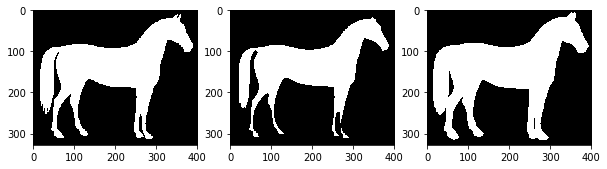

In [0]:
# image binaire
H = data.horse() # L'objet est noir

H = np.logical_not(H) # L'objet est blanc

# éléments structurants
r = 3
B = morphology.disk(r) # mph.square(1+2*r), mph.diamond(r), mph.star(r)
print(B)

J = morphology.erosion(H, B) 
K = morphology.dilation(H, B) 

plt.subplot(1,3,1)
plt.imshow(H, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(J, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(K, cmap='gray')

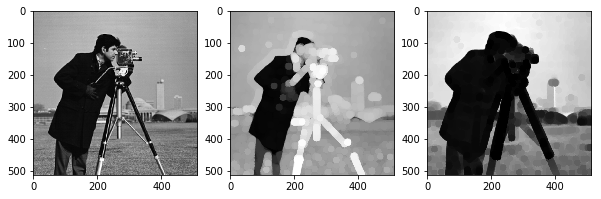

In [0]:
# image en niveaux de gris
I=data.camera()
se=morphology.disk(10)
J=morphology.dilation(I,se)
K=morphology.erosion(I,se)

plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(J,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(K,cmap='gray')


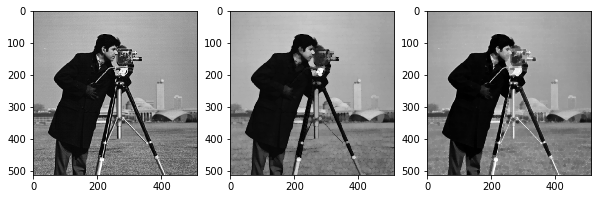

In [0]:
# ouverture - fermeture
I=data.camera()
se=morphology.disk(3)
J=morphology.opening(I,se)
K=morphology.closing(I,se)

plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(J,cmap='gray')

plt.subplot(1,3,3)
plt.imshow(K,cmap='gray')

###  Extraction d'objets 
Dans l'image 'circuit.pgm' :
1. Seuiller pour extraire les pistes et les pastilles du circuit électronique.
2. Lisser pour éliminer le "bruit" blanc et noir. 
3. Extraire les pastilles.
4. Extraire les pistes. 

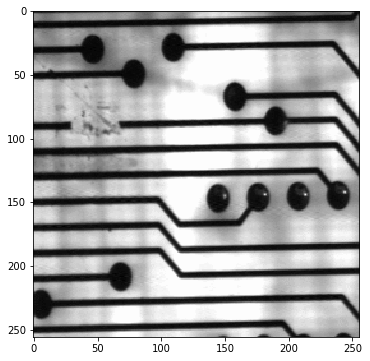

In [0]:
I=skimage.io.imread('circuit.png')
plt.imshow(I,cmap='gray',vmin=0,vmax=255)

### Correction d'illumination
Le but est de seuiller les nombres de l'image 'numbers.png' 

1. Seuiller l'image. Expliquer pourquoi, quelque soit le choix du seuil, le résultat ne sera pas satisfaisant. 
2. Éliminer les chiffres de l'image à l'aide d'une opération morphologique. 
3. En utilisant l'image précédente, corriger l'illumination de l'image originale. 
4. Seuiller de façon à sélectionner les chiffres.

### Restauration

Dans l'image 'barrat4.jpg', on souhaite éliminer les petites rayures noires. Proposer une solution et écrire le script correspondant.

### Fissures

Dans l'image 'soil.tif', on souhaite mettre en valeur les petites fissures du sol. Quel opérateur permet de faire cela ? Écrivez le script correspondant.

### Granulométrie

Dans l’image 'barrat2.jpg' on souhaite obtenir la courbe granulométrique et le pattern spectrum pour des éléments structurants convexes de type disque de rayons croissants.
1. Écrivez une fonction permettant d’effectuer une succession d’ouvertures avec un élément structurant de type disque de taille i ∈ [1...10], et calculant après chaque ouverture le volume de l’image (somme des points de l’image)
2. On souhaite ensuite afficher la courbe granulométrique (taille de l’ouverture en abscisse, somme des points de l’image en ordonnée) ainsi que le pattern-spectrum (dérivée discrète de la courbe granulométrique). 
3. En déduire la taille de la majorité des particules de l’image.